In [169]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from numpy import arange
import math
import allantools

In [154]:
LocationD = pd.read_csv('LocationD-vectornav.csv')

In [299]:
LocationD_x = []
LocationD_y = []
LocationD_z = []
LocationD_ax = []
LocationD_ay = []
LocationD_az = []
time = []
for i in LocationD[".data"]:
    if len(str(i).split(",")) >= 13:
        LocationD_x.append(float(str(i).split(",")[10])) 
        LocationD_y.append(float(str(i).split(",")[11]))
        temp = str(i).split(",")[12]
        LocationD_z.append(float(temp.split("*")[0]))
        
        
for i in LocationD[".data"]:
    if len(str(i).split(",")) >= 10:
        LocationD_ax.append(float(str(i).split(",")[7])) 
        LocationD_ay.append(float(str(i).split(",")[8]))
        LocationD_az.append(float(str(i).split(",")[9]))
        
        
for i in LocationD[".header.stamp.secs"][1:]:
    time.append(i-LocationD[".header.stamp.secs"][0])

# print(len(LocationD))

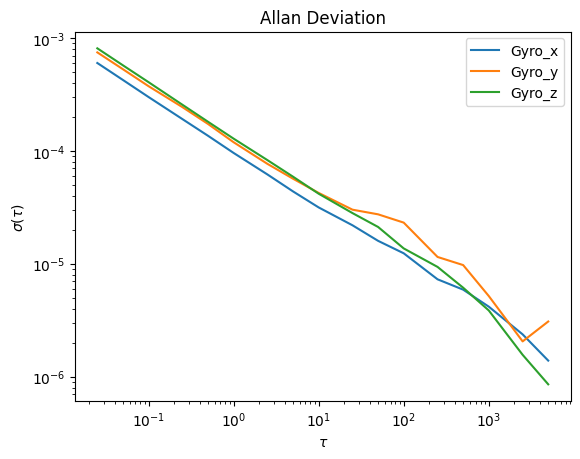

In [318]:
r = 40
(t2, ad, ade, adn) = allantools.adev(np.array(LocationD_x), rate=r, data_type="freq", taus="decade")
(t22, add, adde, addn) = allantools.adev(np.array(LocationD_y), rate=r, data_type="freq", taus="decade")
(t222, addd, addde, adddn) = allantools.adev(np.array(LocationD_z), rate=r, data_type="freq", taus="decade")
fig = plt.loglog(t2, ad,label = "Gyro_x") # Plot the results
fig = plt.loglog(t22, add,label = "Gyro_y")
fig = plt.loglog(t222, addd,label = "Gyro_z")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\sigma(\tau)$')
plt.title("Allan Deviation")
plt.legend()
plt.show()

Angle Random walk(N) of x_axis = 9.511538222518586e-05
Angle Random walk(N) of y_axis = 0.00011846308406044844
Angle Random walk(N) of z_axis = 0.00012830571247610237


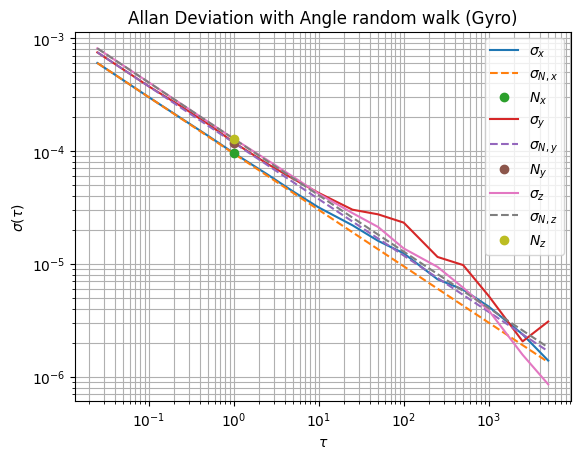

In [307]:
slope = -0.5
logtau = np.log10(t2)
logadev = np.log10(ad)
dlogadev = np.diff(logadev) / np.diff(logtau)
i= np.argmin(abs(dlogadev - slope))

b = logadev[i] - slope*logtau[i]

logN = slope*np.log(1) + b
N = 10**logN
print("Angle Random walk(N) of x_axis = " + str(N))

tauN = 1;
lineN = N / np.sqrt(t2);
fig=  plt.loglog(t2, ad,label = r'$\sigma_x$')
fig=  plt.loglog(t2, lineN, '--',label = r'$\sigma_{N,x}$')
fig=  plt.loglog(tauN, N, 'o',label = r"$N_x$")

slope = -0.5
logtau = np.log10(t22)
logadev = np.log10(add)
dlogadev = np.diff(logadev) / np.diff(logtau)
i= np.argmin(abs(dlogadev - slope))

b = logadev[i] - slope*logtau[i]

logN = slope*np.log(1) + b
N = 10**logN
print("Angle Random walk(N) of y_axis = " + str(N))

tauN = 1;
lineN = N / np.sqrt(t22);
fig=  plt.loglog(t22, add,label = r'$\sigma_y$')
fig=  plt.loglog(t22, lineN, '--',label = r'$\sigma_{N,y}$')
fig=  plt.loglog(tauN, N, 'o',label = r"$N_y$")

slope = -0.5
logtau = np.log10(t222)
logadev = np.log10(addd)
dlogadev = np.diff(logadev) / np.diff(logtau)
i= np.argmin(abs(dlogadev - slope))

b = logadev[i] - slope*logtau[i]

logN = slope*np.log(1) + b
N = 10**logN
print("Angle Random walk(N) of z_axis = " + str(N))

tauN = 1;
lineN = N / np.sqrt(t22);
fig=  plt.loglog(t222, addd,label = r'$\sigma_z$')
fig=  plt.loglog(t222, lineN, '--',label = r'$\sigma_{N,z}$')
fig=  plt.loglog(tauN, N, 'o',label = r"$N_z$")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\sigma(\tau)$')
plt.title("Allan Deviation with Angle random walk (Gyro)")
plt.grid(True, which = "both")
plt.legend()
plt.show()


Rate Random walk(K) of x_axis = 7.985267833890561e-07
Rate Random walk(K) of y_axis = 7.116794847615038e-08
Rate Random walk(K) of z_axis = 9.74761075254622e-06


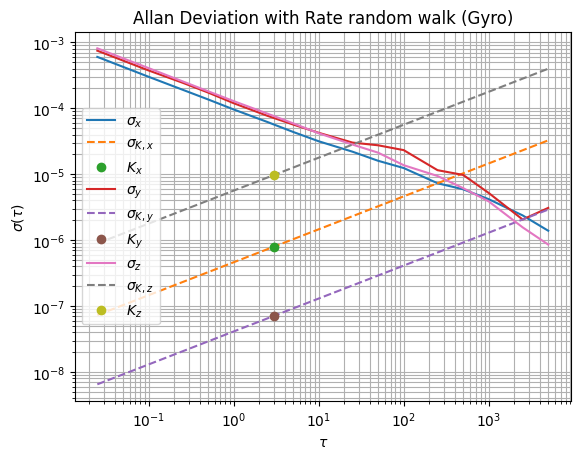

In [302]:
slope = 0.5
logtau = np.log10(t2)
logadev = np.log10(ad)
dlogadev = np.diff(logadev) / np.diff(logtau)
i= np.argmin(abs(dlogadev - slope))

b = logadev[i] - slope*logtau[i]

logK = slope*np.log10(3) + b
K = 10**logK

print("Rate Random walk(K) of x_axis = " + str(K))

tauK = 3;
linek = K * np.sqrt(t2/3);
fig=  plt.loglog(t2, ad,label = r'$\sigma_x$')
fig=  plt.loglog(t2, linek, '--',label = r'$\sigma_{K,x}$')
fig=  plt.loglog(tauK, K, 'o',label = r"$K_x$")

slope = 0.5
logtau = np.log10(t22)
logadev = np.log10(add)
dlogadev = np.diff(logadev) / np.diff(logtau)
i= np.argmin(abs(dlogadev - slope))

b = logadev[i] - slope*logtau[i]

logK = slope*np.log10(3) + b
K = 10**logK

print("Rate Random walk(K) of y_axis = " + str(K))

tauK = 3;
linek = K * np.sqrt(t22/3);
fig=  plt.loglog(t22, add,label = r'$\sigma_y$')
fig=  plt.loglog(t22, linek, '--',label = r'$\sigma_{K,y}$')
fig=  plt.loglog(tauK, K, 'o',label = r"$K_y$")

slope = 0.5
logtau = np.log10(t222)
logadev = np.log10(addd)
dlogadev = np.diff(logadev) / np.diff(logtau)
i= np.argmin(abs(dlogadev - slope))

b = logadev[i] - slope*logtau[i]

logK = slope*np.log10(3) + b
K = 10**logK

print("Rate Random walk(K) of z_axis = " + str(K))

tauK = 3;
linek = K * np.sqrt(t222/3);
fig=  plt.loglog(t222, addd,label = r'$\sigma_z$')
fig=  plt.loglog(t222, linek, '--',label = r'$\sigma_{K,z}$')
fig=  plt.loglog(tauK, K, 'o',label = r"$K_z$")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\sigma(\tau)$')
plt.title("Allan Deviation with Rate random walk (Gyro)")
plt.grid(True, which = "both")
plt.legend()
plt.show()


Bias Instability(B) of x_axis = 1.097352285135066e-05
Bias Instability(B) of y_axis = 4.542037058446187e-05
Bias Instability(B) of z_axis = 4.235988411426918e-05


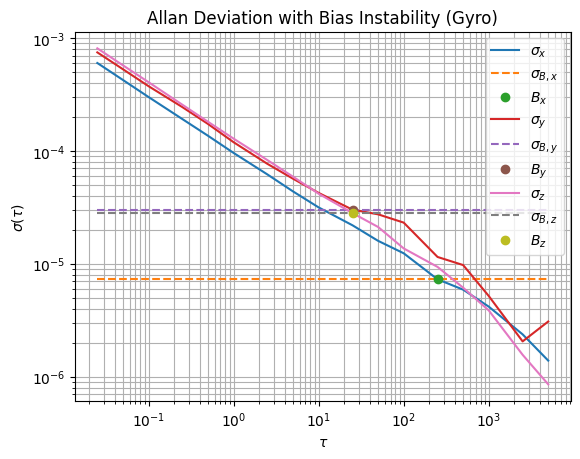

In [317]:
slope = 0
logtau = np.log10(t2)
logadev = np.log10(ad)
dlogadev = np.diff(logadev) / np.diff(logtau)
i= np.argmin(abs(dlogadev - slope))

b = logadev[i] - slope*logtau[i]

scfB = math.sqrt(2*np.log(2)/np.pi)
logB = b - np.log10(scfB)
B = 10**logB

print("Bias Instability(B) of x_axis = " + str(B))

tauB = t2[i];
lineB = B * scfB*np.ones(np.size(t2));
fig=  plt.loglog(t2, ad,label = r'$\sigma_x$')
fig=  plt.loglog(t2, lineB, '--',label = r'$\sigma_{B,x}$')
fig=  plt.loglog(tauB, scfB*B, 'o',label = r"$B_x$")

slope = 0
logtau = np.log10(t22)
logadev = np.log10(add)
dlogadev = np.diff(logadev) / np.diff(logtau)
i= np.argmin(abs(dlogadev - slope))

b = logadev[i] - slope*logtau[i]

scfB = math.sqrt(2*np.log(2)/np.pi)
logB = b - np.log10(scfB)
B = 10**logB

print("Bias Instability(B) of y_axis = " + str(B))

tauB = t22[i];
lineB = B * scfB*np.ones(np.size(t22));
fig=  plt.loglog(t22, add,label = r'$\sigma_y$')
fig=  plt.loglog(t22, lineB, '--',label = r'$\sigma_{B,y}$')
fig=  plt.loglog(tauB, scfB*B, 'o',label = r"$B_y$")

slope = 0
logtau = np.log10(t222)
logadev = np.log10(addd)
dlogadev = np.diff(logadev) / np.diff(logtau)
i= np.argmin(abs(dlogadev - slope))

b = logadev[i] - slope*logtau[i]

scfB = math.sqrt(2*np.log(2)/np.pi)
logB = b - np.log10(scfB)
B = 10**logB

print("Bias Instability(B) of z_axis = " + str(B))

tauB = t222[i];
lineB = B * scfB*np.ones(np.size(t222));
fig=  plt.loglog(t222, addd,label = r'$\sigma_z$')
fig=  plt.loglog(t222, lineB, '--',label = r'$\sigma_{B,z}$')
fig=  plt.loglog(tauB, scfB*B, 'o',label = r"$B_z$")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\sigma(\tau)$')
plt.title("Allan Deviation with Bias Instability (Gyro)")
plt.grid(True, which = "both")
plt.legend()
plt.show()

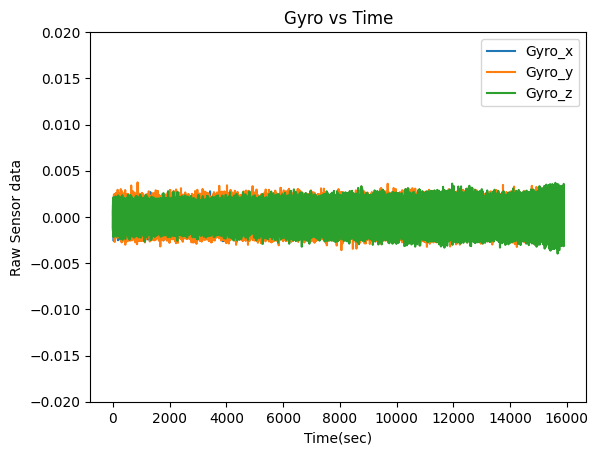

In [319]:
plt.plot(time[:635639],LocationD_x,label = "Gyro_x")
plt.plot(time[:635639],LocationD_y,label = "Gyro_y")
plt.plot(time[:635639],LocationD_z,label = "Gyro_z")
plt.xlabel('Time(sec)')
plt.ylabel('Raw Sensor data')
plt.title("Gyro vs Time")
plt.ylim(-0.02,0.02)
plt.legend()
plt.show()

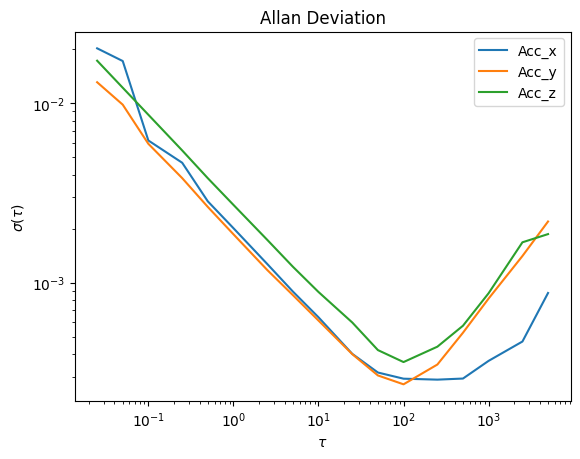

In [305]:

r = 40
(ta2, aad, aade, aadn) = allantools.adev(np.array(LocationD_ax), rate=r, data_type="freq", taus="decade")
(ta22, aadd, aadde, aaddn) = allantools.adev(np.array(LocationD_ay), rate=r, data_type="freq", taus="decade")
(ta222, aaddd, aaddde, aadddn) = allantools.adev(np.array(LocationD_az), rate=r, data_type="freq", taus="decade")
fig = plt.loglog(ta2, aad,label = "Acc_x") # Plot the results
fig = plt.loglog(ta22, aadd,label = "Acc_y")
fig = plt.loglog(ta222, aaddd,label = "Acc_z")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\sigma(\tau)$')
plt.title("Allan Deviation")
plt.legend()
plt.show()

Angle Random walk(N) of x_axis = 0.0020117827232224157
Angle Random walk(N) of y_axis = 0.0018607902502887537
Angle Random walk(N) of z_axis = 0.00272465901262918


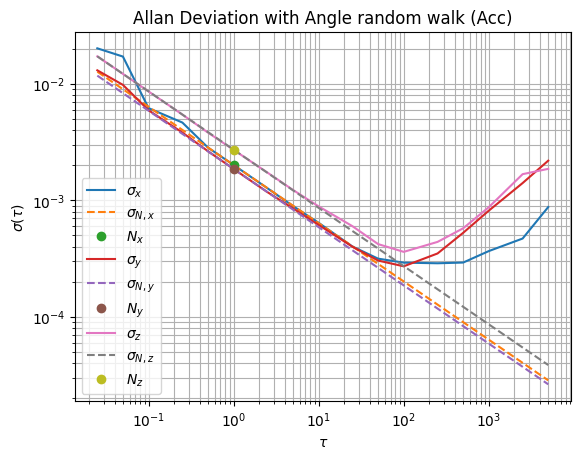

In [312]:
slope = -0.5
logtau = np.log10(ta2)
logadev = np.log10(aad)
dlogadev = np.diff(logadev) / np.diff(logtau)
i= np.argmin(abs(dlogadev - slope))

b = logadev[i] - slope*logtau[i]

logN = slope*np.log(1) + b
N = 10**logN
print("Angle Random walk(N) of x_axis = " + str(N))

tauN = 1;
lineN = N / np.sqrt(ta2);
fig=  plt.loglog(ta2, aad,label = r'$\sigma_x$')
fig=  plt.loglog(ta2, lineN, '--',label = r'$\sigma_{N,x}$')
fig=  plt.loglog(tauN, N, 'o',label = r"$N_x$")

slope = -0.5
logtau = np.log10(ta22)
logadev = np.log10(aadd)
dlogadev = np.diff(logadev) / np.diff(logtau)
i= np.argmin(abs(dlogadev - slope))

b = logadev[i] - slope*logtau[i]

logN = slope*np.log(1) + b
N = 10**logN
print("Angle Random walk(N) of y_axis = " + str(N))

tauN = 1;
lineN = N / np.sqrt(ta22);
fig=  plt.loglog(ta22, aadd,label = r'$\sigma_y$')
fig=  plt.loglog(ta22, lineN, '--',label = r'$\sigma_{N,y}$')
fig=  plt.loglog(tauN, N, 'o',label = r"$N_y$")

slope = -0.5
logtau = np.log10(ta222)
logadev = np.log10(aaddd)
dlogadev = np.diff(logadev) / np.diff(logtau)
i= np.argmin(abs(dlogadev - slope))

b = logadev[i] - slope*logtau[i]

logN = slope*np.log(1) + b
N = 10**logN
print("Angle Random walk(N) of z_axis = " + str(N))

tauN = 1;
lineN = N / np.sqrt(ta222);
fig=  plt.loglog(ta222, aaddd,label = r'$\sigma_z$')
fig=  plt.loglog(ta222, lineN, '--',label = r'$\sigma_{N,z}$')
fig=  plt.loglog(tauN, N, 'o',label = r"$N_z$")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\sigma(\tau)$')
plt.title("Allan Deviation with Angle random walk (Acc)")
plt.grid(True, which = "both")
plt.legend()
plt.show()


Rate Random walk(K) of x_axis = 2.2638043792477425e-05
Rate Random walk(K) of y_axis = 3.8316077586473355e-05
Rate Random walk(K) of z_axis = 4.45802871233469e-05


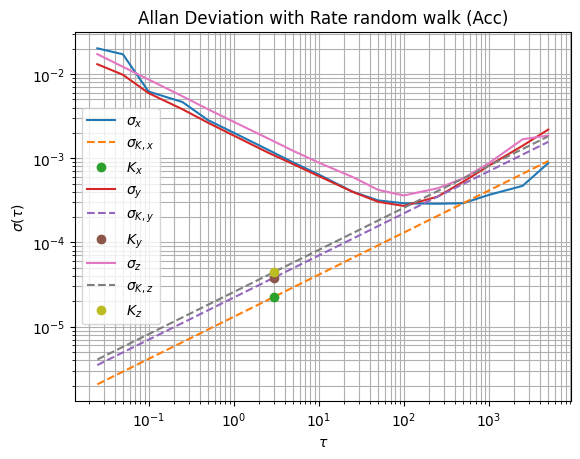

In [308]:
slope = 0.5
logtau = np.log10(ta2)
logadev = np.log10(aad)
dlogadev = np.diff(logadev) / np.diff(logtau)
i= np.argmin(abs(dlogadev - slope))

b = logadev[i] - slope*logtau[i]

logK = slope*np.log10(3) + b
K = 10**logK

print("Rate Random walk(K) of x_axis = " + str(K))

tauK = 3;
linek = K * np.sqrt(ta2/3);
fig=  plt.loglog(ta2, aad,label = r'$\sigma_x$')
fig=  plt.loglog(ta2, linek, '--',label = r'$\sigma_{K,x}$')
fig=  plt.loglog(tauK, K, 'o',label = r"$K_x$")

slope = 0.5
logtau = np.log10(ta22)
logadev = np.log10(aadd)
dlogadev = np.diff(logadev) / np.diff(logtau)
i= np.argmin(abs(dlogadev - slope))

b = logadev[i] - slope*logtau[i]

logK = slope*np.log10(3) + b
K = 10**logK

print("Rate Random walk(K) of y_axis = " + str(K))

tauK = 3;
linek = K * np.sqrt(ta22/3);
fig=  plt.loglog(ta22, aadd,label = r'$\sigma_y$')
fig=  plt.loglog(ta22, linek, '--',label = r'$\sigma_{K,y}$')
fig=  plt.loglog(tauK, K, 'o',label = r"$K_y$")

slope = 0.5
logtau = np.log10(ta222)
logadev = np.log10(aaddd)
dlogadev = np.diff(logadev) / np.diff(logtau)
i= np.argmin(abs(dlogadev - slope))

b = logadev[i] - slope*logtau[i]

logK = slope*np.log10(3) + b
K = 10**logK

print("Rate Random walk(K) of z_axis = " + str(K))

tauK = 3;
linek = K * np.sqrt(ta222/3);
fig=  plt.loglog(ta222, aaddd,label = r'$\sigma_z$')
fig=  plt.loglog(ta222, linek, '--',label = r'$\sigma_{K,z}$')
fig=  plt.loglog(tauK, K, 'o',label = r"$K_z$")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\sigma(\tau)$')
plt.title("Allan Deviation with Rate random walk (Acc)")
plt.grid(True, which = "both")
plt.legend()
plt.show()


Bias Instability(B) of x_axis = 0.00043913899289314546
Bias Instability(B) of y_axis = 0.00045771937104467983
Bias Instability(B) of z_axis = 0.0025256580038480396


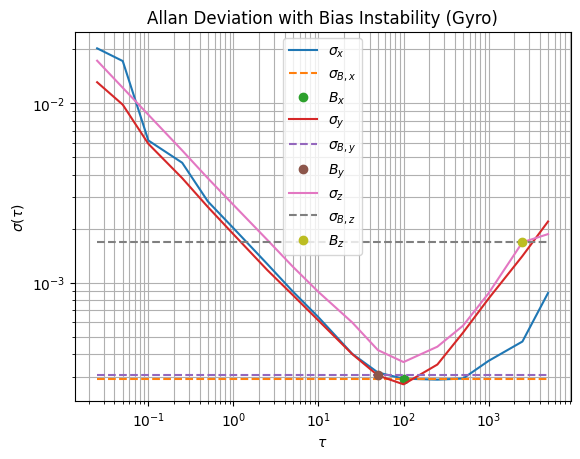

In [314]:
slope = 0
logtau = np.log10(ta2)
logadev = np.log10(aad)
dlogadev = np.diff(logadev) / np.diff(logtau)
i= np.argmin(abs(dlogadev - slope))

b = logadev[i] - slope*logtau[i]

scfB = math.sqrt(2*np.log(2)/np.pi)
logB = b - np.log10(scfB)
B = 10**logB

print("Bias Instability(B) of x_axis = " + str(B))

tauB = ta2[i];
lineB = B * scfB*np.ones(np.size(ta2));
fig=  plt.loglog(ta2, aad,label = r'$\sigma_x$')
fig=  plt.loglog(ta2, lineB, '--',label = r'$\sigma_{B,x}$')
fig=  plt.loglog(tauB, scfB*B, 'o',label = r"$B_x$")

slope = 0
logtau = np.log10(ta22)
logadev = np.log10(aadd)
dlogadev = np.diff(logadev) / np.diff(logtau)
i= np.argmin(abs(dlogadev - slope))

b = logadev[i] - slope*logtau[i]

scfB = math.sqrt(2*np.log(2)/np.pi)
logB = b - np.log10(scfB)
B = 10**logB

print("Bias Instability(B) of y_axis = " + str(B))

tauB = ta22[i];
lineB = B * scfB*np.ones(np.size(ta22));
fig=  plt.loglog(ta22, aadd,label = r'$\sigma_y$')
fig=  plt.loglog(ta22, lineB, '--',label = r'$\sigma_{B,y}$')
fig=  plt.loglog(tauB, scfB*B, 'o',label = r"$B_y$")

slope = 0
logtau = np.log10(ta222)
logadev = np.log10(aaddd)
dlogadev = np.diff(logadev) / np.diff(logtau)
i= np.argmin(abs(dlogadev - slope))

b = logadev[i] - slope*logtau[i]

scfB = math.sqrt(2*np.log(2)/np.pi)
logB = b - np.log10(scfB)
B = 10**logB

print("Bias Instability(B) of z_axis = " + str(B))

tauB = ta222[i];
lineB = B * scfB*np.ones(np.size(ta222));
fig=  plt.loglog(ta222, aaddd,label = r'$\sigma_z$')
fig=  plt.loglog(ta222, lineB, '--',label = r'$\sigma_{B,z}$')
fig=  plt.loglog(tauB, scfB*B, 'o',label = r"$B_z$")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\sigma(\tau)$')
plt.title("Allan Deviation with Bias Instability (Gyro)")
plt.grid(True, which = "both")
plt.legend()
plt.show()

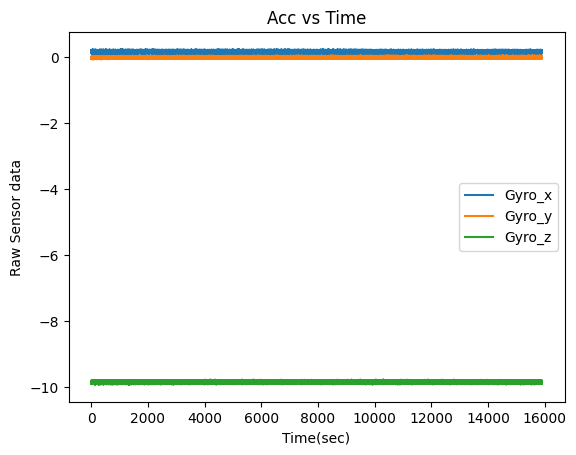

In [316]:
plt.plot(time[:635645],LocationD_ax,label = "Gyro_x")
plt.plot(time[:635645],LocationD_ay,label = "Gyro_y")
plt.plot(time[:635645],LocationD_az,label = "Gyro_z")
plt.xlabel('Time(sec)')
plt.ylabel('Raw Sensor data')
plt.title("Acc vs Time")
plt.legend()
plt.show()